In [2]:
# Import necessary modules

# WordCloud packages
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import numpy as np

# Gensim packages
import gensim
from gensim import corpora
from gensim.models import LdaModel, LdaMulticore
from gensim.models import CoherenceModel
import gensim.downloader as api
#from gensim.utils import simple_preprocess, lemmatize

import pprint
import re
import logging

# NLTK packages
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# Download NLTK resources (you only need to do this once)
# nltk.download('punkt')
# nltk.download('stopwords')


ModuleNotFoundError: No module named 'gensim'

In [ ]:
#following the instructions, i first need to import the word doc processor

transcripts_path= "/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/08_Fieldwork/08_Data/Qual/transcripts/"
qual_plots = "/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/08_Fieldwork/08_Data/Qual/wordclouds/"
import docx

def read_word_document(docx_file):
    doc = docx.Document(docx_file)
    text = [p.text for p in doc.paragraphs]
    return '\n'.join(text)

# Specify the path to your Word document
#docx_file = transcripts_path +'Alywin_Nyasha_Mapuzva_Tavonga Mhungu Transcript.docx'
#docx_file = transcripts_path +'Janet kanyeta Transcript.docx'
#docx_file = transcripts_path +'Munyaradzi_Ruocha Transcript.docx'
#docx_file= transcripts_path + 'Brighton Chingoto_Transcript.docx'
#docx_file= transcripts_path + 'Edith_Mareya_Transcript.docx'
#docx_file= transcripts_path + 'Happymore Transcript.docx'
#docx_file= transcripts_path + 'Peter Fombe_Transcript.docx'
docx_file= transcripts_path + 'Polite Mayendayenda_Transcript-1.docx'

document_text = read_word_document(docx_file)
#lowercase all document

#print(document_text)

In [105]:
#Set the stopwords
stopwords= set(STOPWORDS)
punc=  {".", ",", "!", "?", ";", ":", "'", '"', "(", ")", "[", "]", "{", "}", "’"}

exp_stopwords= {'FD','PM', 'R', 'Yes', 'Alright', 'Aah', 'Aaah', 'right', 'Oh', 'Ok', 'Ok.', 'Eh', 'Eeh', 'Eeeh', 'Ummm', 'No', 'I',  'people', 'Haa', 'Ah', 'time', 'day', 's', 'so', 'So','ok', 'eh', 'fine', }
verb_stopwords= {'will', 'Let', 'go', 'come', 'came', 'coming', 'back', 'going', 'went', 'say', 'said', 'see', 'saw', 'last', 'every', 'know', 'sometimes', 'usually', 'often', 'now','many', 'place', 'places', 'around'}
people_stopwords = {'we', 'you','them', 'us', 'he', 'He','one'}
stopwords.update(punc)
stopwords.update(exp_stopwords)
stopwords.update(verb_stopwords)
stopwords.update(people_stopwords)

# Define a list of integers as strings
integers_as_strings = {str(i) for i in range(2030)}  # Creates a set of numbers up till 2030

# Remove integers from the stopwords set
stopwords.update(integers_as_strings)



In [4]:
#print(stopwords)

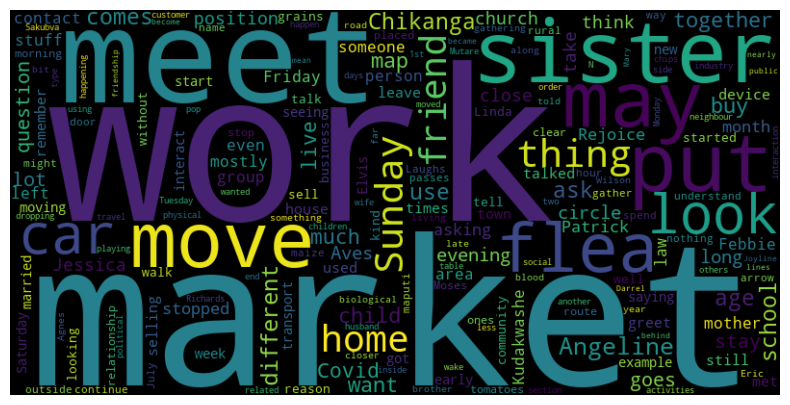

In [106]:
# make a word cloud with the text with the stopwords specified
wordcloud = WordCloud(width=800, height=400, background_color='black',  random_state=1, collocations=False, stopwords=stopwords).generate(document_text)
#colormap='ocean',
#other color map options https://matplotlib.org/stable/tutorials/colors/colormaps.html

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#individual exports
#plt.savefig(qual_plots+'Alywin_transport_worker_WC.png', dpi=300)
#plt.savefig(qual_plots+'Brighton_transport_worker_WC.png', dpi=300)
#plt.savefig(qual_plots+'Edith_farmer_WC.png', dpi=300)
#plt.savefig(qual_plots+'Happymore_bricklayer_WC.png', dpi=300)
#plt.savefig(qual_plots+'Janet_ag_worker_WC.png', dpi=300)
#plt.savefig(qual_plots+'Happymore_bricklayer_WC.png', dpi=300)
#plt.savefig(qual_plots+'Kennedy_transport_WC.png', dpi=300)
#plt.savefig(qual_plots+'Peter_HCW_WC.png', dpi=300)
plt.savefig(qual_plots+'Polite_Vendor_WC.png', dpi=300)


In [107]:

# Tokenization
words = word_tokenize(document_text)

filtered_words = [word for word in words if word not in stopwords]

# # Lemmatize the words to cut words into their original stem
# lemmatizer = WordNetLemmatizer()
# tokens = [lemmatizer.lemmatize(word) for word in words]


# Stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]
#print(filtered_words)

In [108]:
# run gensim 

# Sample dataset is the document text imported above
# Create a Gensim dictionary from the paragraphs
dictionary = corpora.Dictionary([filtered_words])

# Create a Gensim corpus
corpus = [dictionary.doc2bow(filtered_words)]

#print(dictionary)
dictionary.token2id

{'..': 0,
 '10:30': 1,
 '12:30': 2,
 '12:30a': 3,
 '1st': 4,
 '25th': 5,
 '26th': 6,
 '27th': 7,
 '28th': 8,
 '2:15': 9,
 '2nd': 10,
 '2pm': 11,
 '30th': 12,
 '3:30': 13,
 '4:20': 14,
 '4pm': 15,
 '5:30': 16,
 '5:40': 17,
 '5pm': 18,
 '6am': 19,
 '7pm': 20,
 '8:30': 21,
 '8am': 22,
 '8pm': 23,
 '9:30': 24,
 '9pm': 25,
 'A': 26,
 'Activities': 27,
 'Agnes': 28,
 'All': 29,
 'Also': 30,
 'Amongst': 31,
 'And': 32,
 'Angeline': 33,
 'Approximately': 34,
 'Are': 35,
 'Around': 36,
 'As': 37,
 'At': 38,
 'Aves': 39,
 'Avocados': 40,
 'B.': 41,
 'Banana': 42,
 'Because': 43,
 'Before': 44,
 'Behind': 45,
 'Beit': 46,
 'Between': 47,
 'Beyond': 48,
 'Bocha': 49,
 'Bongai': 50,
 'But': 51,
 'Can': 52,
 'Catholic': 53,
 'Cemetery': 54,
 'Chikanga': 55,
 'Chikanga…': 56,
 'Chikomo': 57,
 'China': 58,
 'Chisamba': 59,
 'Church': 60,
 'College': 61,
 'Computers': 62,
 'Covid': 63,
 'Dangare': 64,
 'Darrel': 65,
 'Did': 66,
 'Different': 67,
 'Do': 68,
 'Does': 69,
 'Dora': 70,
 'Dropping': 71,
 'D

In [109]:
#build an lda model using gensim
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics and their keywords
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# # Compute the coherence score to evaluate the model
coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_words, dictionary=dictionary, coherence='c_v')
#coherence_lda = coherence_model_lda.get_coherence()
#print(f"Coherence Score:+ {coherence_lda}")


(0, '0.012*"We" + 0.010*"You" + 0.010*"Then" + 0.009*"How" + 0.009*"work"')
(1, '0.001*"We" + 0.001*"How" + 0.001*"Then" + 0.001*"work" + 0.001*"It"')
(2, '0.001*"We" + 0.001*"It" + 0.001*"You" + 0.001*"Then" + 0.001*"What"')
(3, '0.001*"Then" + 0.001*"We" + 0.001*"work" + 0.001*"You" + 0.001*"But"')
(4, '0.001*"Then" + 0.001*"We" + 0.001*"meet" + 0.001*"How" + 0.001*"What"')


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis